# Disease Prediction Modelling

This notebook trains and evaluates baseline machine learning models to predict broad veterinary disease categories from clinical symptoms and basic patient measurements.

## Objectives
- Establish a simple, interpretable baseline classifier
- Evaluate class-level performance across disease categories
- Identify strengths and limitations of symptom-based prediction

## Scope
- Uses preprocessed data from `02_preprocessing.ipynb`
- Focuses on baseline models (no hyperparameter tuning)
- Model optimisation and advanced methods are out of scope for this notebook


In [31]:
import pandas as pd

In [32]:
data = pd.read_csv("data/processed/vet_disease_processed.csv")

In [33]:
data.head(5)

,Animal_Type,Breed,Age,Gender,Weight,Appetite_Loss,Vomiting,Diarrhea,Coughing,Labored_Breathing,...,symptom_labored_breathing,symptom_nasal_discharge,symptom_eye_discharge,symptom_lameness,symptom_skin_lesions,symptom_weight_loss,symptom_swollen_joints,symptom_dehydration,Duration_days,Body_Temperature_C
0,Dog,Labrador,4,Male,25.0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,3.0,39.5
1,Cat,Siamese,2,Female,4.5,0,0,0,1,0,...,0,1,1,0,0,0,0,0,7.0,38.9
2,Cow,Holstein,3,Female,600.0,1,0,0,1,1,...,1,1,0,0,0,0,0,0,5.0,40.1
3,Dog,Beagle,1,Male,10.0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,2.0,39.2
4,Cat,Persian,5,Male,3.8,1,0,0,0,0,...,0,0,0,0,1,0,0,0,14.0,38.7


In [34]:
data = data.drop(columns=["Disease_Prediction", "Disease_clean", "Disease_nospecies"])

In [35]:
# set as x and y for models

x = data.drop(columns=["Disease_final", "Animal_type", "Gender", "Breed"])
y = data["Disease_final"]

In [36]:
# test train split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.2,
    random_state=19,
    stratify=y
)

# sanity check

print(f"This dataset contains {len(y)} samples.")
print(f"This dataset contains {x.shape[1]} features.")
print(f"This dataset contains {len(set(y))} classes.")

This dataset contains 431 samples.
This dataset contains 30 features.
This dataset contains 13 classes.


In [13]:
# Scale numeric features
from sklearn.preprocessing import StandardScaler

numeric_cols = [
    "Age",
    "Weight",
    "Heart_Rate",
    "Duration_days",
    "Body_Temperature_C",
]

scaler = StandardScaler()

x_train[numeric_cols] = scaler.fit_transform(x_train[numeric_cols])
x_test[numeric_cols] = scaler.transform(x_test[numeric_cols])



## **MODEL 1: Logistic Regression**

In [14]:
from sklearn.linear_model import LogisticRegression

In [18]:
model = LogisticRegression(
    max_iter=2000,
    solver="lbfgs",
    n_jobs=-1
)

model.fit(x_train, y_train)

C:\Users\k1tty\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1184: FutureWarning: 'n_jobs' has no effect since 1.8 and will be removed in 1.10. You provided 'n_jobs=-1', please leave it unspecified.
  warnings.warn(msg, category=FutureWarning)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [19]:


print(f"The weights associated with the features are stored in the variable 'model.coef_', and are {model.coef_}.")
print(f"The bias stored in the variable 'model.intercept_', and here is equal to {model.intercept_}.")


The weights associated with the features are stored in the variable 'model.coef_', and are [[ 6.50831133e-01 -6.33593121e-01 -4.68249560e-01 -6.38095195e-01
  -2.23725314e-01 -4.44767925e-01  3.89681773e-01 -2.42323092e-02
  -5.59868659e-01 -1.81149939e-01 -5.62893625e-01 -1.65476388e-01
   3.39990015e-01 -3.12405747e-01  8.05460942e-02 -1.43317826e-01
  -9.91636725e-02 -6.85086398e-01 -5.06831986e-01 -2.39866612e-01
  -7.95479205e-03  1.15233378e+00 -1.11562382e-01 -3.91375936e-01
   4.73251491e-01 -2.23461488e-02  8.40899828e-01  3.08308238e-01]
 [ 1.77443220e-01 -8.97221181e-01  1.60130045e-01  8.07202494e-02
   1.65278783e-01  4.33492199e-01  1.81720684e-03 -4.36187452e-01
   3.58531199e-01  9.46778128e-01 -4.92065903e-01  1.15230953e+00
  -1.43857785e-01  1.45478560e-01  2.44360586e-01  1.09029950e+00
  -1.02730573e+00  1.98722210e-01  4.49703973e-01 -3.88110888e-01
  -2.20789339e-01 -9.75319265e-02  7.92926498e-01 -1.34422521e-01
  -1.66656938e-01 -9.99915521e-02 -5.20011694e-01 

In [20]:
y_lr_predict_test = model.predict(x_test)

print(f"The true class labels are:      {y_test}")
print(f"The predicted class labels are: {y_lr_predict_test}")


The true class labels are:      1            respiratory disease
294                      scrapie
276          respiratory disease
361       systemic viral disease
125          respiratory disease
                 ...            
16                         other
92                         other
13                         other
172                        other
258    viral respiratory disease
Name: Disease_final, Length: 87, dtype: str
The predicted class labels are: ['respiratory disease' 'respiratory disease' 'systemic viral disease'
 'other' 'viral respiratory disease' 'parvovirus' 'tuberculosis'
 'distemper' 'other' 'other' 'viral respiratory disease'
 'systemic viral disease' 'systemic viral disease' 'other'
 'gastrointestinal disease' 'gastrointestinal disease'
 'respiratory disease' 'other' 'other' 'other' 'systemic viral disease'
 'other' 'respiratory disease' 'parvovirus' 'parvovirus' 'other'
 'systemic viral disease' 'other' 'viral respiratory disease'
 'respiratory disease' '

In [21]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_lr_predict_test)

print(f'Congratulations! Your Linear Regression scored an accuracy of {accuracy}!')


Congratulations! Your Linear Regression scored an accuracy of 0.3793103448275862!


 Model performs better than by chance!  Random guessing across 12 classes would expect ~ 0.08 accuracy.


In [22]:
from sklearn.metrics import classification_report

In [23]:
print(classification_report(y_test, y_lr_predict_test))

                           precision    recall  f1-score   support

                arthritis       0.00      0.00      0.00         1
                distemper       0.00      0.00      0.00         2
   foot and mouth disease       0.00      0.00      0.00         2
 gastrointestinal disease       0.33      0.17      0.22         6
                influenza       1.00      0.17      0.29         6
                 mastitis       1.00      1.00      1.00         1
                    other       0.54      0.62      0.58        24
               parvovirus       0.29      0.40      0.33         5
      respiratory disease       0.18      0.19      0.18        16
                  scrapie       1.00      0.50      0.67         2
   systemic viral disease       0.30      0.46      0.36        13
             tuberculosis       0.00      0.00      0.00         3
viral respiratory disease       0.43      0.50      0.46         6

                 accuracy                           0.38    

C:\Users\k1tty\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\k1tty\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\k1tty\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

**Note on undefined precision warnings**

Some disease classes appear with zero precision or recall.  
This occurs when a class is present in the test data but the model does not predict any samples for that class.  
Given the very small number of samples for certain diseases, this behaviour is expected and reflects data scarcity rather than a modelling error.


## Interpreting the Classification Report

The classification report summarises how well the model predicts each disease category.  
Each row corresponds to a disease class, and the columns represent different performance metrics:

**Precision**  
The proportion of cases predicted as a given disease that were actually correct.  
High precision means the model is cautious and usually right when it makes that prediction.

**Recall**  
The proportion of true cases of a disease that the model successfully identifies.  
High recall means the model is good at finding that disease when it is present.

**F1-score**  
The harmonic mean of precision and recall.  
This provides a balanced single score when there is a trade-off between precision and recall.

**Support**  
The number of true samples for each disease in the test dataset.  
Classes with very small support are more difficult for the model to learn and evaluate reliably.

### How to read the results

- Common disease categories with clear symptom patterns tend to show better recall and F1-scores.
- Rare diseases often have low recall or zero scores due to limited examples rather than model failure.
- Misclassifications frequently occur between clinically similar conditions (e.g. respiratory and viral respiratory diseases), which reflects overlapping symptom profiles.
- The **"other"** category acts as a catch-all for rare or heterogeneous conditions and is expected to have moderate performance.

Overall, the classification report provides insight not only into model accuracy, but also into *where* and *why* errors occur, which is particularly important in a clinical context.


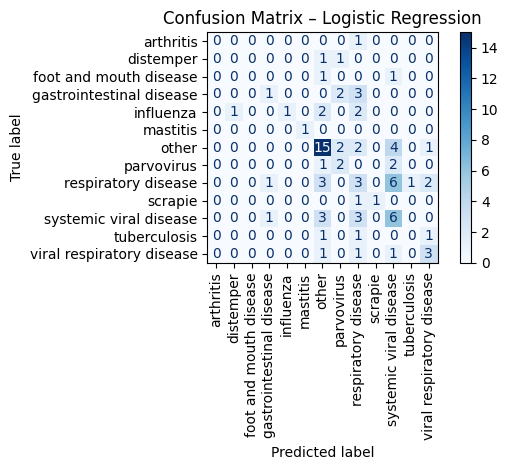

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_lr_predict_test,
    xticks_rotation="vertical",
    cmap="Blues"
)

plt.title("Confusion Matrix – Logistic Regression")
plt.tight_layout()
plt.show()


The confusion matrix shows that most misclassifications occur between clinically similar disease categories, particularly within respiratory and systemic viral conditions. Rare diseases are frequently absorbed into the “other” category, reflecting limited sample sizes rather than model failure. Overall, the error patterns are clinically plausible and indicate that the model is learning meaningful symptom–disease relationships.

## **Model 2:** Class Balanced Logistic Regression

In [26]:
# create model weighted for rare classes

model_balanced = LogisticRegression(
    max_iter=2000,
    solver="lbfgs",
    class_weight="balanced"
)

model_balanced.fit(x_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",'balanced'
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :ter

In [27]:
y_pred_balanced = model_balanced.predict(x_test)

print(classification_report(y_test, y_pred_balanced))

                           precision    recall  f1-score   support

                arthritis       0.00      0.00      0.00         1
                distemper       0.25      0.50      0.33         2
   foot and mouth disease       0.25      1.00      0.40         2
 gastrointestinal disease       0.33      0.17      0.22         6
                influenza       0.17      0.17      0.17         6
                 mastitis       0.33      1.00      0.50         1
                    other       0.80      0.17      0.28        24
               parvovirus       0.27      0.60      0.38         5
      respiratory disease       0.00      0.00      0.00        16
                  scrapie       0.12      0.50      0.20         2
   systemic viral disease       0.31      0.38      0.34        13
             tuberculosis       0.00      0.00      0.00         3
viral respiratory disease       0.21      0.50      0.30         6

                 accuracy                           0.25    

In [28]:


print("Accuracy (balanced):", accuracy_score(y_test, y_pred_balanced))


Accuracy (balanced): 0.25287356321839083


<Figure size 1000x800 with 0 Axes>

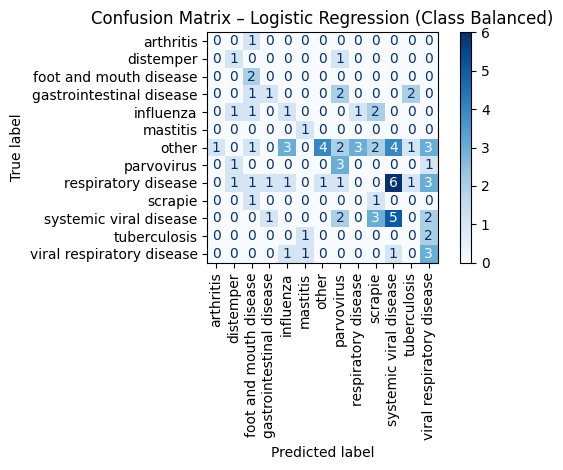

In [29]:


plt.figure(figsize=(10, 8))

ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred_balanced,
    xticks_rotation=90,
    cmap="Blues",
    values_format="d"
)

plt.title("Confusion Matrix – Logistic Regression (Class Balanced)")
plt.tight_layout()
plt.show()


### Effect of Class Weighting

Applying class weighting increases recall for rare disease categories, ensuring that uncommon but clinically important conditions are detected.  
This comes at the cost of reduced overall accuracy and increased confusion among common and clinically similar diseases.

The balanced model prioritises sensitivity over precision, making it more suitable for exploratory or screening contexts, whereas the unweighted model provides more conservative predictions.


## **Model 3: Random Forest

In [37]:
# reload data, 
data = data.drop(columns=["Disease_Prediction", "Disease_clean", "Disease_nospecies"])

KeyError: "['Disease_Prediction', 'Disease_clean', 'Disease_nospecies'] not found in axis"

In [45]:
# set as x and y for models

target = "Disease_final"

X_rf = data.drop(columns=[target, "Breed"])
y = data[target]


In [49]:
X_rf.columns

Index(['Animal_Type', 'Age', 'Gender', 'Weight', 'Appetite_Loss', 'Vomiting',
       'Diarrhea', 'Coughing', 'Labored_Breathing', 'Lameness', 'Skin_Lesions',
       'Nasal_Discharge', 'Eye_Discharge', 'Heart_Rate', 'symptom_fever',
       'symptom_lethargy', 'symptom_appetite_loss', 'symptom_vomiting',
       'symptom_diarrhea', 'symptom_coughing', 'symptom_labored_breathing',
       'symptom_nasal_discharge', 'symptom_eye_discharge', 'symptom_lameness',
       'symptom_skin_lesions', 'symptom_weight_loss', 'symptom_swollen_joints',
       'symptom_dehydration', 'Duration_days', 'Body_Temperature_C'],
      dtype='str')

In [50]:
X_rf = pd.get_dummies(
    X_rf,
    columns=["Animal_Type","Gender"],
    drop_first=True
)


In [51]:
# test train split

from sklearn.model_selection import train_test_split

X_train_rf, X_test_rf, y_train, y_test = train_test_split(
    X_rf,
    y,
    test_size=0.2,
    random_state=19,
    stratify=y
)

# sanity check

print(f"This dataset contains {len(y)} samples.")
print(f"This dataset contains {x.shape[1]} features.")
print(f"This dataset contains {len(set(y))} classes.")

This dataset contains 431 samples.
This dataset contains 30 features.
This dataset contains 13 classes.


In [52]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    class_weight="balanced",
    n_jobs=-1
)

rf_model.fit(X_train_rf, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",300
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [53]:
y_pred_rf = rf_model.predict(X_test_rf)

print(classification_report(y_test, y_pred_rf))



                           precision    recall  f1-score   support

                arthritis       0.00      0.00      0.00         1
                distemper       0.00      0.00      0.00         2
   foot and mouth disease       0.00      0.00      0.00         2
 gastrointestinal disease       0.60      0.50      0.55         6
                influenza       0.40      0.33      0.36         6
                 mastitis       1.00      1.00      1.00         1
                    other       0.40      0.58      0.47        24
               parvovirus       0.33      0.20      0.25         5
      respiratory disease       0.41      0.44      0.42        16
                  scrapie       0.00      0.00      0.00         2
   systemic viral disease       0.33      0.31      0.32        13
             tuberculosis       0.50      0.33      0.40         3
viral respiratory disease       0.50      0.50      0.50         6

                 accuracy                           0.41    

C:\Users\k1tty\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\k1tty\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\k1tty\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

Overall accuracy increases to 0.41

<Figure size 1000x800 with 0 Axes>

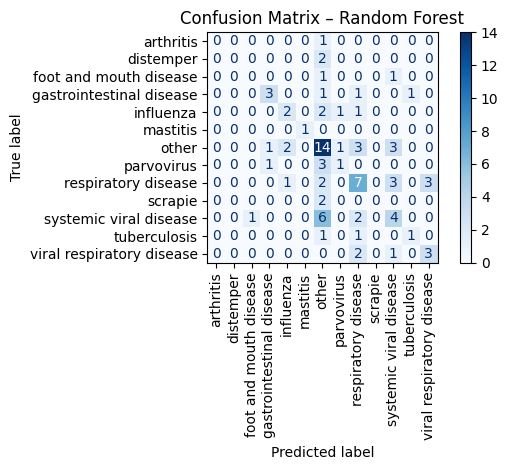

In [55]:
plt.figure(figsize=(10, 8))

ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred_rf,
    xticks_rotation=90,
    cmap="Blues",
    values_format="d"
)

plt.title("Confusion Matrix – Random Forest")
plt.tight_layout()
plt.show()

## Interpretation of Random Forest Evaluation Results

The Random Forest model demonstrates the strongest overall performance among the models evaluated.  
Both the classification report and confusion matrix indicate that the model is able to capture complex, non-linear relationships between symptoms, clinical measurements, and animal context.

### Confusion Matrix Interpretation

The confusion matrix shows a clear concentration of correct predictions along the diagonal for common disease categories, indicating improved discrimination compared to simpler models.

Most misclassifications occur between clinically similar conditions, particularly within respiratory and systemic viral diseases. These error patterns are clinically plausible and reflect overlapping symptom profiles rather than random guessing.

Importantly, the Random Forest does not collapse predictions into a single dominant class and maintains a more even distribution of predictions across disease categories.

### Overall Interpretation

The Random Forest model provides the best balance between sensitivity and specificity for this dataset.  
It improves performance on common disease categories while maintaining reasonable behaviour for rare conditions, making it a strong candidate for exploratory clinical decision support rather than definitive diagnosis.

Future improvements would likely require larger datasets, additional clinical features, or hierarchical disease 


### Model Comparison Summary

Three models were evaluated: a baseline logistic regression, a class-weighted logistic regression, and a Random Forest classifier.

The Random Forest achieved the best overall performance, with improved accuracy and balanced F1-scores across disease categories.  
Compared to logistic regression, it better captured non-linear interactions between symptoms, species, and clinical measurements.

Class weighting improved recall for rare diseases but reduced overall performance, highlighting a trade-off between sensitivity and precision.  
Overall, the Random Forest provides the most robust balance for this dataset.
